# Implement the polynomial regression model on the weather dataset. Use Min temp, and Max Temp and rain fall variable as input.  for the output, i need all the learned coefficients, and the scatter plot, and the best fit curve generated  by  the polynomial regression.

In [60]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Selecting MinTemp, MaxTemp and Rainfall

In [61]:
df = df[["MinTemp","MaxTemp","Rainfall"]]
m=len(df)
df.head()

,MinTemp,MaxTemp,Rainfall
0,13.4,22.9,0.6
1,7.4,25.1,0.0
2,12.9,25.7,0.0
3,9.2,28.0,0.0
4,17.5,32.3,1.0


Fill in missing values

In [62]:
(df.isnull().sum()/len(df))*100

MinTemp     1.020899
MaxTemp     0.866905
Rainfall    2.241853
dtype: float64

In [63]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())

In [64]:
X = df[["MinTemp","MaxTemp"]]
X.head()

,MinTemp,MaxTemp
0,13.4,22.9
1,7.4,25.1
2,12.9,25.7
3,9.2,28.0
4,17.5,32.3


In [65]:
X["MaxTemp_2"] = X["MaxTemp"]**2
X["MinTemp_3"] = X["MinTemp"]**3
X.head()

,MinTemp,MaxTemp,MaxTemp_2,MinTemp_3
0,13.4,22.9,524.41,2406.104
1,7.4,25.1,630.01,405.224
2,12.9,25.7,660.49,2146.689
3,9.2,28.0,784.00,778.688
4,17.5,32.3,1043.29,5359.375


In [66]:
Y = df["Rainfall"]
Y.head()

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
Name: Rainfall, dtype: float64

### Printing the learned coefficients

In [67]:
X = X/X.max()
import numpy as np
theta = np.array([0]*len(X.columns))

def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent(X, Y, theta, 0.05, 700)

print(theta)

[ 5.74109838  1.03039018 -2.59051049  1.31962543]


In [68]:
y_hat = theta*X
y_hat = np.sum(y_hat,axis=1)
y_hat.head()

0    2.254231
1    1.099222
2    2.068382
3    1.306412
4    2.669002
dtype: float64

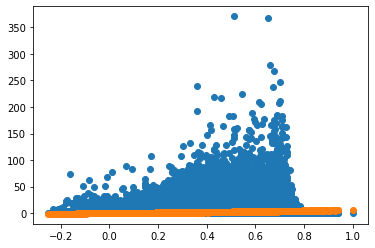

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X["MinTemp"],y= Y)          
plt.scatter(x=X['MinTemp'], y=y_hat)
plt.show()

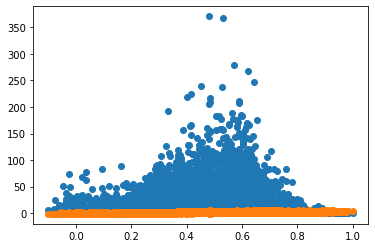

In [70]:
plt.figure()
plt.scatter(x=X["MaxTemp"],y= Y)          
plt.scatter(x=X['MaxTemp'], y=y_hat)
plt.show()

## Best Fit Curve

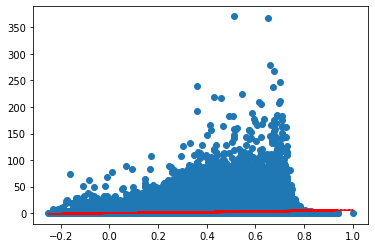

In [73]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

pyplot.scatter(X["MinTemp"], Y)

x_line = X["MinTemp"]

y_line = y_hat

pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

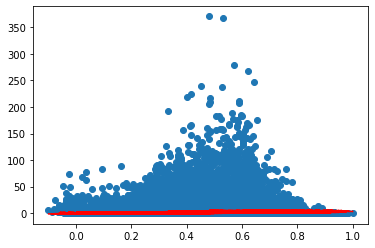

In [74]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

pyplot.scatter(X["MaxTemp"], Y)

x_line = X["MaxTemp"]

y_line = y_hat

pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()